In [64]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.6.0

numpy  : 1.23.4
scipy  : 1.9.3
sklearn: 1.1.3
pandas : 1.5.1

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.10.16.3-microsoft-standard-WSL2
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit



In [65]:
%matplotlib inline
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/workspaces/toce


In [66]:
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
from data.preprocess import read_raw_data, preprocess_data,get_features,get_targets
from visualization.exploratory import exploratory_visualization

In [67]:
data_fname = os.path.join(PROJ_ROOT, 'data', 'raw', 'toce.csv')
raw_data = read_raw_data(data_fname)
raw_data.head()

,sample,depth_m,facies_num,bioturb,amb1,amb2,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k,toc,if
0,PEVP1-15,207.0,12,0,0,1,6,3,1,1,1,3,32.0,19.0,49.0,0.0,NaN,NaN
1,PEVP1-14,205.0,12,0,0,1,6,3,1,3,1,3,35.0,16.0,49.0,0.0,0.09,0.84
2,PEVP1-13,202.0,12,0,0,1,6,3,1,2,1,3,39.0,11.0,49.0,0.0,NaN,NaN
3,PEVP1-11,197.0,12,0,0,1,6,3,1,3,1,3,30.0,15.0,55.0,0.0,NaN,NaN
4,PEVP1-10,195.0,12,0,0,1,6,3,1,3,0,3,28.0,21.0,51.0,0.0,NaN,NaN


In [68]:
preprocessed_data = preprocess_data(raw_data)
preprocessed_data.head()

,sample,depth_m,facies_num,bioturb,amb1,amb2,drx_qz,drx_pl,drx_fk,drx_ca,drx_py,drx_arc,drx_arc_i,drx_arc_is,drx_arc_cl,drx_arc_k,toc,if
1,PEVP1-14,205.0,12,0,0,1,6,3,1,3,1,3,35.0,16.0,49.0,0.0,0.09,0.84
5,PEVP1-9,191.0,12,0,0,1,6,4,1,3,0,3,38.0,14.0,48.0,0.0,0.09,0.80
7,PEVP1-6,173.0,12,0,0,1,6,3,1,2,1,3,29.0,30.0,41.0,0.0,0.09,0.87
10,PEVP1-2,157.0,12,0,0,1,6,3,1,1,1,3,32.0,9.0,58.0,0.0,0.09,0.87
13,PG 60,136.0,10,0,1,0,6,3,1,4,0,3,34.0,21.0,45.0,0.0,1.48,0.71


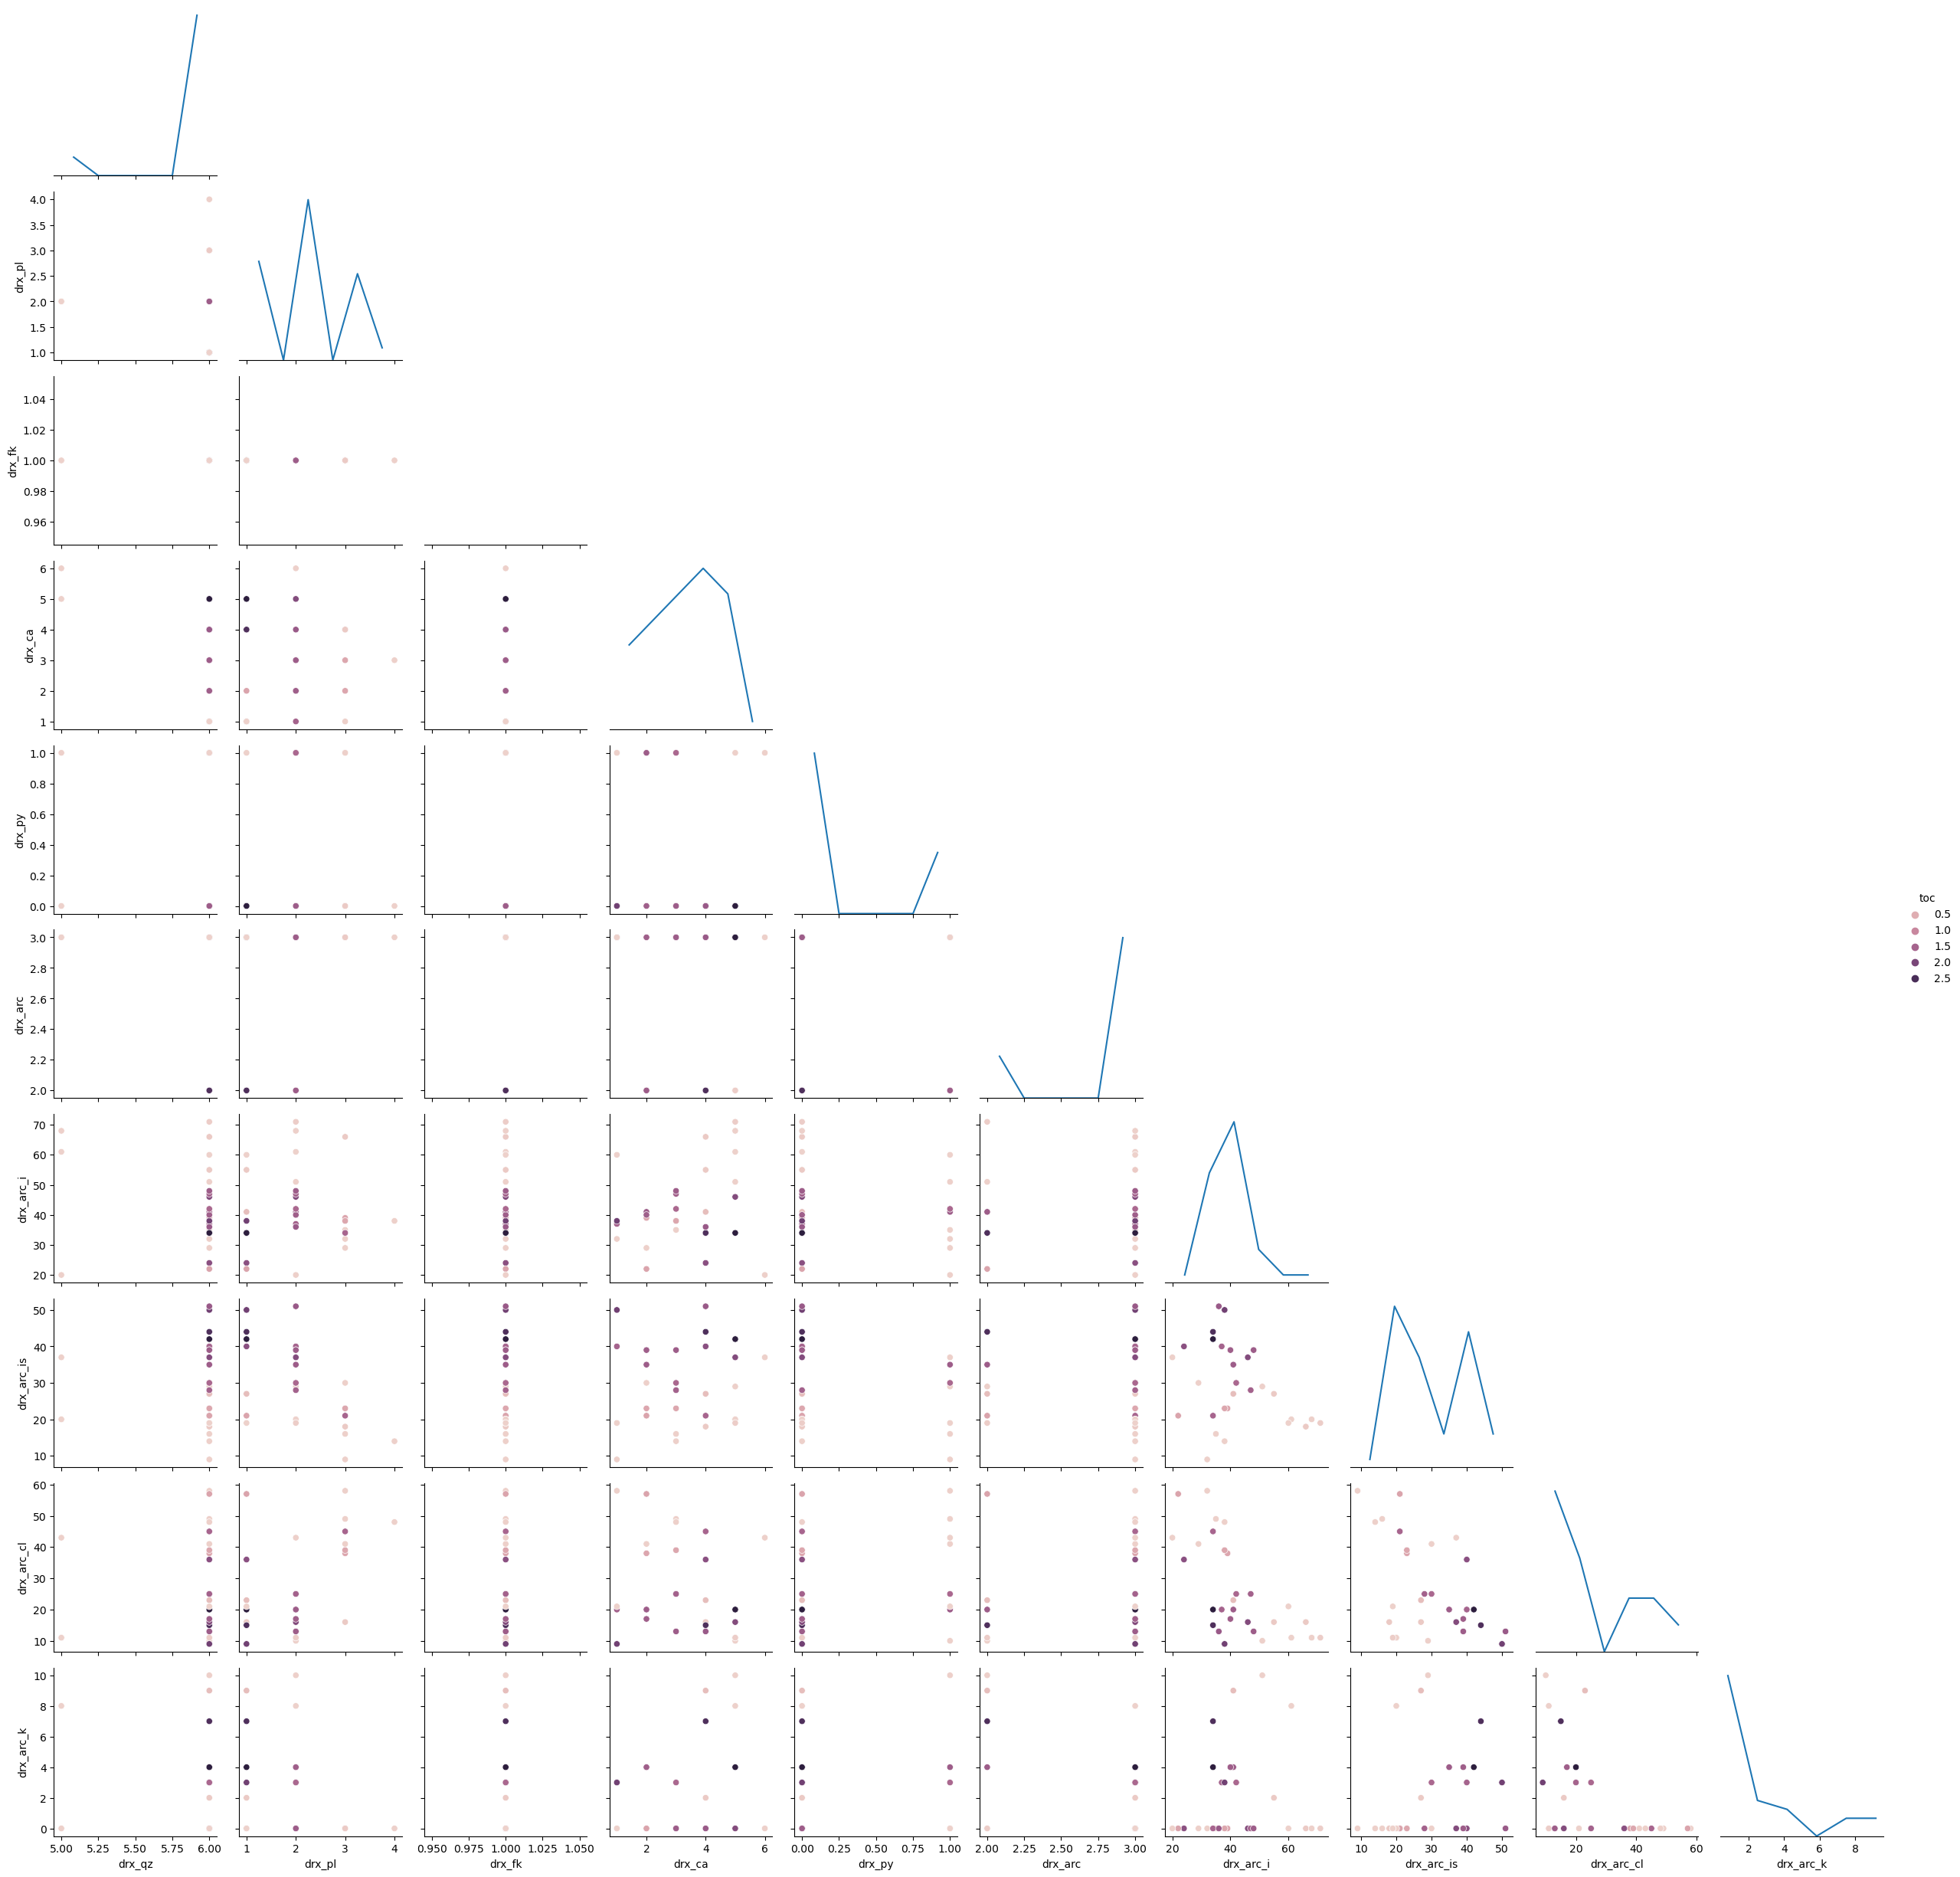

In [69]:
exploratory_visualization(preprocessed_data) 

In [70]:
from sklearn.svm import SVR

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [80]:
model = SVR(C=0.0019091131576909443, epsilon=0.6634465582030861,kernel='linear')

In [83]:
X=get_features(preprocessed_data)
y=get_targets(preprocessed_data) 
model.fit(X,y)

SVR(C=0.0019091131576909443, epsilon=0.6634465582030861, kernel='linear')

In [84]:
y_pred=model.predict(X)

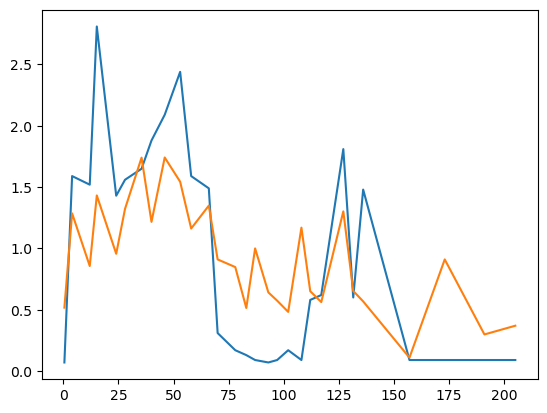

In [85]:
import matplotlib.pyplot as plt
plt.plot(preprocessed_data['depth_m'],y)
plt.plot(preprocessed_data['depth_m'],y_pred)